# Linear algebra overview

This notebook introduces concepts form linear algebra in a birds-eye overview. The goal is not to get into the details, but to give the reader a taste of the different types of thinking: computational, geometrical, and theoretical, that are used in linear algebra.

## Plan

  - Prerequisites
    - Numbers
    - Functions
    - Geometry    
  - Vectors
    - Def'n 
    - Geomterical interpretation
    - Dot product
      - Def'n
      - Intuition
      - Unit length vectors
  - Projections
    - Projection operation
    - Example: projection onto the line with equation $x-y=0$
  - Linear transformation == vector functions
    - Linear property: $f(a\mathbf{x} + b\mathbf{y}) = af(\mathbf{x}) + bf(\mathbf{y})$
    - Projection transformation P
  - Matrix representation of linear transformations
    - Linear transformation <--> Matrix-vector product equivalence
    - Show matrix representation M_P of Projection transformation P
  - Matrices
    - Def'n 
    - Matrix operations
      - Matrix-vector product 
      - Matrix-matrix product
      - Trace
      - Determinant
      - Matrix inverse
      - Matrix equations
      - Reduced row echelon form 
  - Linear transformations
    - Fundamental spaces
      - Vector spaces
    - Matrix representations
    - Eigenvectors and eigenvalues
  - Further topics
    - Computational procedures
    - Analytical geometry
      - Points, lines, and planes
      - Projections
      - Distances
    - Abstract vector spaces
      - Vector space of polynomials, e.g. $p(x)=a_0 + a_1x + a_2x^2$
    - Special types of matrices

In [1]:
# setup SymPy
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing()

# setup plotting
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as mpl
from plot_helpers import plot_vec, plot_vecs, plot_line, plot_plane, autoscale_arrows

## Vectors

In [2]:
# define two vectors
u = Matrix([1,1])
v = Matrix([1,-1])
u

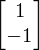

In [3]:
v

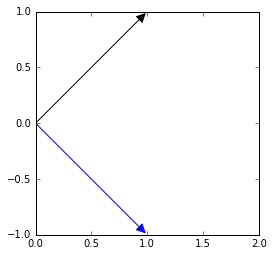

In [4]:
fig = mpl.figure()
plot_vecs(u,v)
autoscale_arrows()

### Vector addition

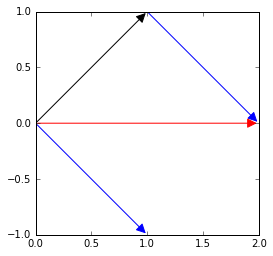

In [7]:
# graphical
fig = mpl.figure()
plot_vecs(u,v)
plot_vec(v, at=u, color='b')
plot_vec(u+v, color='r')
autoscale_arrows()

# algebraic
u+v

In [2]:
a = 3
a

3